In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sc
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import math



### Test if missingness is at random

Missingness completely at random: independent of data and other features. Fill in with mode (categorical) or median (numeric)

Missing at random: dependends on other factors but not on the missing value itself: conditional average.

Missing not at random: Missing is the signal and means something. Replace by "Missing"


Fill in None if the value does not exist (i.e. not just a missing value)
Fill in "Missing" or "Unknown" if the value exists but was no recorded.

In [2]:
## Setting max displayed rows to 500, in order to display the full output of any command 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df = pd.read_csv("train.csv")
df.isna().sum().sort_values(ascending = False).head(25)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
dtype: int64

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

In [61]:
def clean_up_MSSubClass(df):
    
    MSsbcl = {20: "1-STORY 1946 & NEWER ALL STYLES",
            30: "1-STORY 1945 & OLDER",
            40: "1-STORY W/FINISHED ATTIC ALL AGES",
            45: "1-1/2 STORY - UNFINISHED ALL AGES",
            50: "1-1/2 STORY FINISHED ALL AGES",
            60: "2-STORY 1946 & NEWER",
            70: "2-STORY 1945 & OLDER",
            75: "2-1/2 STORY ALL AGES",
            80: "SPLIT OR MULTI-LEVEL",
            85: "SPLIT FOYER",
            90: "DUPLEX - ALL STYLES AND AGES",
           120: "1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
           150: "1-1/2 STORY PUD - ALL AGES",
           160: "2-STORY PUD - 1946 & NEWER",
           180: "PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
           190: "2 FAMILY CONVERSION - ALL STYLES AND AGES"
    }
    ### Important remark: we could have used df["MSSubClass"] = df["MSSubClass"].astype("category") 
    ### or simply df["MSSubClass"] = df["MSSubClass"].astype(str)
    
    
    #df["MSSubClass"] = df["MSSubClass"].map(lambda x: MSsbcl[x])
    df["MSSubClass"] = df["MSSubClass"].map(MSsbcl)
    #df["MSSubClass"] = df["MSSubClass"].astype("category")
    return df

df = clean_up_MSSubClass(df)

# There are two rows with non null MasVnrType but whose MasVnrArea is zero. Impute them by the median per MasVnrType      #df.loc[df["MasVnrArea"]==0, ["MasVnrType"]].value_counts()

mask = (df["MasVnrArea"]==0) & (~df["MasVnrType"].isna())
df.loc[mask, 'MasVnrArea'] = (df.groupby("MasVnrType")
                              ["MasVnrArea"].median())

# There are 13 rows with null MasVnrType but nonzero MasVnrArea. Impute the missing value by the mode.
mask = (df["MasVnrArea"]!=0) & (df["MasVnrType"].isna())
df.loc[mask, "MasVnrType"] = df["MasVnrType"].mode()[0]

# Let's fill in the missing values for MasVnr. 
# For the MasVnrArea that are NA but the MasVnrType is not NA, impute the median per MasVnrType group. 
# For the MasVnrType that are missing, impute None, since the value does not exist, according to the documentation
# For the remaining NA MasVnrArea, impute zero, since by construction the MasVnrType was None.

df["MasVnrArea"] = df.groupby("MasVnrType")["MasVnrArea"].transform(lambda x: x.fillna(x.median()))
df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

# There is only one row with Electrical missing. Impute with mode
mask = df["Electrical"].isna()
df.loc[mask, "Electrical"] = df["Electrical"].mode()[0]

# Remark df.loc[df["MiscFeature"].isna(),  ["MiscVal"]].value_counts() shows that whenever MiscFeature is missing, the MiscVal is zero. 
# We can safely fill the missing values with None.

# The features PoolQC, MiscFeature, Alley, Fence, MasVnrType, FireplaceQu, GarageYrBlt, GarageCond, GarageType, GarageFinish, GarageQual,
# BsmtExposure, BsmtFinType2, BsmtCond, BsmtQual, BsmtFinType1, can be filled with "None"

to_fill_with_None = [
    "PoolQC", "MiscFeature", "Alley", "Fence", "MasVnrType", "FireplaceQu", "GarageYrBlt", "GarageCond", "GarageType", 
    "GarageFinish", "GarageQual", "BsmtExposure", "BsmtFinType2", "BsmtCond", "BsmtQual", "BsmtFinType1"
]

cat_col = df[to_fill_with_None].select_dtypes(exclude = 'number').columns
num_col = df[to_fill_with_None].select_dtypes(include = 'number').columns

df[cat_col] = df[cat_col].fillna("None")
df[num_col] = df[num_col].fillna(pd.NA)



In [11]:
df.columns[df.isna().any()]

Index(['LotFrontage', 'GarageYrBlt'], dtype='object')

### Question:

Let M be the missingness random variable of feature F1. If we have shown that M is independent of F2, can we conclude that 

F1|F2, M=1 has the same distribution as F1|F2, M=0?

In [15]:
def toType(dtype):
    if pd.api.types.is_bool_dtype(dtype):
        return "Categorical"
    elif pd.api.types.is_numeric_dtype(dtype):
        return "Numeric"
    else:
        return "Categorical"
        
# Function to find the best categorical variable to impute the missing data of another numerical one


def imputation_error(df, target, predictor, cv = 5, random_state = 0):

    target_type  = toType(df[target])
    predictor_type = toType(df[predictor])

    mask = df[target].isna()
    new_df = df.loc[~mask, [target, predictor]]
    kf = KFold(n_splits = 5, shuffle = True, random_state = 0)
    SSE = []

    for train_idx, test_idx in kf.split(new_df):
        # Split
        X_tr = new_df.iloc[train_idx][[predictor]].to_numpy() #NOTE DOUBLE BRACKETS!
        X_te = new_df.iloc[test_idx ][[predictor]].to_numpy() #NOTE DOUBLE BRACKETS!
        Y_tr = new_df.iloc[train_idx][target].to_numpy()
        Y_te = new_df.iloc[test_idx ][target].to_numpy()

        if target_type == "Numeric":
            if predictor_type == "Numeric":
                # Regression
                reg = LinearRegression().fit(X_tr, Y_tr)
                Y_hat = reg.predict(X_te)
                SSE.append(np.sum((Y_hat - Y_te)**2))
            else:
                # Median imputation
                df_train = new_df.iloc[train_idx]
                df_test  = new_df.iloc[test_idx]
                medians  =  df_train.groupby(predictor)[target].median()
                Y_hat_cat = df_test[predictor].map(medians)
                SSE.append(np.sum((Y_hat_cat - df_test[target])**2))

        if target_type == "Categorical":
            if predictor_type == "Numeric":
                #????????????????????????
                break
            else: 
                # Mode imputation
                df_train = new_df.iloc[train_idx]
                df_test  = new_df.iloc[test_idx]
                modes  =  df_train.groupby(predictor)[target].agg(lambda x: x.mode().iloc[0])
                Y_hat_cat = df_test[predictor].map(modes)
                SSE.append(np.sum(Y_hat_cat != df_test[target]))
    return np.mean(SSE)
    

In [17]:
complete_columns = df.loc[:, ~df.isna().any()].columns
complete_columns

errors = {col: imputation_error(df, "LotFrontage", col) for col in complete_columns}



In [19]:
pd.Series(errors).sort_values(ascending = True)

BldgType         109796.450000
1stFlrSF         112445.107428
Neighborhood     118924.400000
GrLivArea        119568.631418
TotalBsmtSF      120716.432740
MSSubClass       120920.444577
SalePrice        124372.241906
TotRmsAbvGrd     124931.986747
GarageArea       125362.383799
MSZoning         125578.200000
LotArea          126564.636858
RoofMatl         128889.700000
GarageType       129888.250000
GarageCars       130376.103344
Fireplaces       131949.061749
BedroomAbvGr     132412.385941
OverallQual      132963.078694
FireplaceQu      133800.550000
LotConfig        134061.950000
GarageFinish     134561.200000
BsmtQual         135435.000000
BsmtFinSF1       135937.572426
MasVnrArea       136625.595744
FullBath         136689.730046
KitchenQual      136855.250000
ExterQual        137044.700000
Alley            137465.600000
RoofStyle        137831.750000
BsmtExposure     138616.750000
OpenPorchSF      138966.729875
BsmtUnfSF        139246.104786
Foundation       139624.500000
YearBuil

# Test if missingness is independent of the feature that we want to use for imputation

In [21]:
# Function to systematically test whether missingness in target is independent of the values of predictor

def indep_missingness(df, target, predictor):
    predictor_type = toType(df[predictor])

    if predictor_type == "Categorical":
        #First build a contingency table
        table = pd.crosstab(df[target].isna(), df[predictor])
        res = sc.chi2_contingency(table)
        print(f'p-value of the chi-square test: {res.pvalue}')
        return res.pvalue
    else:
        mask = df[target].isna()
        stat_less, p_less = sc.mannwhitneyu(df.loc[mask, predictor], df.loc[~mask, predictor], alternative = "less")
        stat_greater, p_greater = sc.mannwhitneyu(df.loc[mask, predictor], df.loc[~mask, predictor], alternative = "greater")
        stat_two_sided, p_two_sided = sc.mannwhitneyu(df.loc[mask, predictor], df.loc[~mask, predictor], alternative = "two-sided")
        print(f'p-value less: {p_less}')
        print(f'p-value greater: {p_greater}')
        print(f'p-value two-sided: {p_two_sided}')
        return min(p_less, p_grater, p_two_sided)
        

Go through the features one by one and accept the first feature that is independent of the missingness of the target.

In [23]:
res = "None"
for predictor in pd.Series(errors).sort_values(ascending = True).index:
    print(predictor)
    if indep_missingness(df, "LotFrontage", predictor)>.05:
        res = predictor
        break
    
res

BldgType
p-value of the chi-square test: 0.09718732062446044


'BldgType'

## Visualization (histograms)

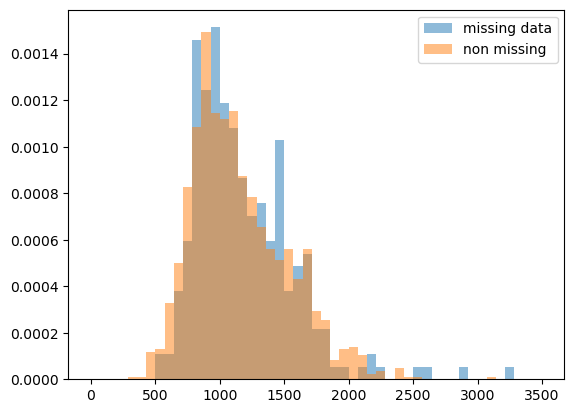

0.1   -51.8
0.2   -14.2
0.3   -37.6
0.4    -9.4
0.5   -14.0
0.6   -25.6
0.7   -24.0
0.8    30.4
0.9    31.4
Name: 1stFlrSF, dtype: float64

In [26]:
# If the feature we want to use for imputation is numeric: plot the distributions conditional on missingness or non-missingess

mask = df["LotFrontage"].isna()
bins = np.linspace(0, 3500, 50)
plt.hist(df.loc[mask, "1stFlrSF"], bins, density = True, label = 'missing data', alpha = .5)
plt.hist(df.loc[~mask, "1stFlrSF"], bins, density = True, label = 'non missing', alpha = .5)
plt.legend()
plt.show()

# Also print the quantiles conditional on missingness and non-missingness
quantiles = df.groupby(mask)["1stFlrSF"].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
quantiles[False] - quantiles[True]
#print(quantiles)


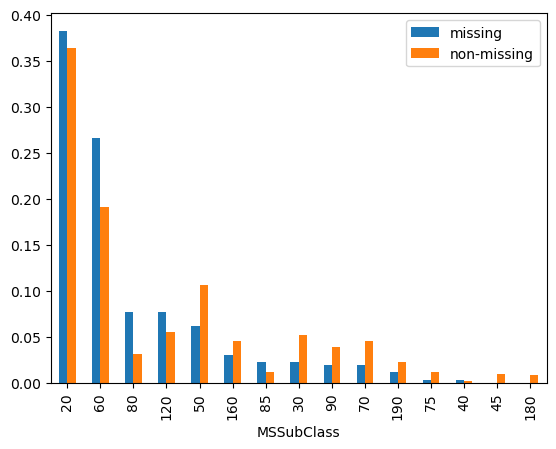

p-value of the chi-square test: 6.529516091106863e-05


In [28]:
# If the feature we want to use for imputation is categorical as well: CHI-SQUARE TEST OF INDEPENDENCE

target = "LotFrontage"
predictor = "MSSubClass"

# First plot the histograms
missing = df.loc[ df[target].isna(), predictor].value_counts(normalize = True)
non_missing = df.loc[~df[target].isna(), predictor].value_counts(normalize = True)
pd.concat(
    [missing, non_missing],
    axis = 1,
    keys = ["missing", "non-missing"]
).plot(kind = "bar")
plt.legend()
plt.show()

#First build a contingency table
table = pd.crosstab(
    df[target].isna(),
    df[predictor]
)

res = sc.chi2_contingency(table)
print(f'p-value of the chi-square test: {res.pvalue}')

# p-value around 10%, not significant! We can assume that missingness in LotFrontage is independent of BldgType
# Hence, impute the missing values by the mode in each category


In [91]:

def fill_NA(df1, df2):
    df2 = df2.copy()
    # MSSubClass appears as numeric, but it is actually a categorical variable    
    
    df2["GarageYrBlt"] = df2["GarageYrBlt"].fillna(df2["YearBuilt"])

    # There are two rows with non null MasVnrType but whose MasVnrArea is zero. Impute them by the median per MasVnrType      #df.loc[df["MasVnrArea"]==0, ["MasVnrType"]].value_counts()

    mask = (df2["MasVnrArea"]==0) & (~df2["MasVnrType"].isna())
    df2.loc[mask, 'MasVnrArea'] = (df1.groupby("MasVnrType")
                                  ["MasVnrArea"].median())
    
    # There are 13 rows with null MasVnrType but nonzero MasVnrArea. Impute the missing value by the mode.
    mask = (df2["MasVnrArea"]!=0) & (df2["MasVnrType"].isna())
    df2.loc[mask, "MasVnrType"] = df1["MasVnrType"].mode()[0]
    
    # Let's fill in the missing values for MasVnr. 
    # For the MasVnrArea that are NA but the MasVnrType is not NA, impute the median per MasVnrType group. 
    # For the MasVnrType that are missing, impute None, since the value does not exist, according to the documentation
    # For the remaining NA MasVnrArea, impute zero, since by construction the MasVnrType was None.

    medians_by_MasVnrType = df1.groupby("MasVnrType")["MasVnrArea"].median()
    df2.loc[df2["MasVnrArea"].isna(), "MasVnrArea"] = df2.loc[df2["MasVnrArea"].isna(), "MasVnrType"].map(medians_by_MasVnrType)
    #df2["MasVnrArea"] = df1.groupby("MasVnrType")["MasVnrArea"].transform(lambda x: x.fillna(x.median()))
    df2["MasVnrType"] = df2["MasVnrType"].fillna("None")
    df2["MasVnrArea"] = df2["MasVnrArea"].fillna(0)
    
    # There is only one row with Electrical missing. Impute with mode
    mask = df2["Electrical"].isna()
    df2.loc[mask, "Electrical"] = df1["Electrical"].mode()[0]
    
    # Remark df.loc[df["MiscFeature"].isna(),  ["MiscVal"]].value_counts() shows that whenever MiscFeature is missing, the MiscVal is zero. 
    # We can safely fill the missing values with None.

    # The features PoolQC, MiscFeature, Alley, Fence, MasVnrType, FireplaceQu, GarageYrBlt, GarageCond, GarageType, GarageFinish, GarageQual,
    # BsmtExposure, BsmtFinType2, BsmtCond, BsmtQual, BsmtFinType1, can be filled with "None"
    
    to_fill_with_None = [
        "PoolQC", "MiscFeature", "Alley", "Fence", "MasVnrType", "FireplaceQu", "GarageYrBlt", "GarageCond", "GarageType", 
        "GarageFinish", "GarageQual", "BsmtExposure", "BsmtFinType2", "BsmtCond", "BsmtQual", "BsmtFinType1"
    ]
    
    cat_col = df2[to_fill_with_None].select_dtypes(exclude = 'number').columns
    num_col = df2[to_fill_with_None].select_dtypes(include = 'number').columns
    
    df2[cat_col] = df2[cat_col].fillna("None")
    df2[num_col] = df2[num_col].fillna(pd.NA)
    
    # Fill LotFrontage using BldgType
    predictor = "BldgType"
    target = "LotFrontage"
    medians_by_BldgType = df1.groupby(predictor)[target].median()
    df2.loc[df2[target].isna(), target] = df2.loc[df2[target].isna(), predictor].map(medians_by_BldgType)
    
    #df[target] = (
    #    df.groupby(predictor)[target]
    #      .transform(lambda x: x.fillna(x.median()))
    #)

    # If we had wanted to use 1stFlrSF

    #predictor = "1stFlrSF"
    #target = "LotFrontage"
    
    #mask = df1[target].isna()
    #X_tr = df1.loc[~mask, [predictor]].to_numpy()
    #Y_tr = df1.loc[~mask, target].to_numpy()
    #reg = LinearRegression().fit(X_tr, Y_tr)
    
    #df2.loc[df2[target].isna(), [target]] = reg.predict(df2.loc[df2[target].isna(), [predictor]].to_numpy())

    ################################################################################
    ## Last, if there are any other missing values, use mode or median imputation ##
    ################################################################################
    
    remaining_missing = df2.columns[df2.isna().any()]
    
    cat_col = df2[remaining_missing].select_dtypes(exclude='number').columns
    num_col = df2[remaining_missing].select_dtypes(include='number').columns
    
    train_modes = df1.mode().iloc[0]
    train_medians = df1.median(numeric_only=True)
    
    for c in cat_col:
        if c in train_modes:
            df2[c] = df2[c].fillna(train_modes[c]).infer_objects(copy=False)
    
    for c in num_col:
        if c in train_medians:
            df2[c] = df2[c].fillna(train_medians[c])


    # Check if there are any remaining NAs
    if df2.isna().any().any():
        print("Remaining NaNs:")
        print(df2.isna().sum()[df2.isna().sum() > 0])


    return df2

In [53]:
fill_NA(df,df).isna().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
Alley            False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinSF1       False
BsmtFinType2     False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
1stFlrSF   

In [30]:
df.loc[:, df.isna().any()].columns

Index(['LotFrontage', 'GarageYrBlt'], dtype='object')

### I got lucky, I found two features that explained well the observed values of LotFrontage and such that the missingness in LotFrontage was independent of these two features. But what if all the features available in the dataframe had been correlated with the missingness?

In this case, impute "NA". There are other techniques but they seem involved.


### Also, what if another feature explains the data well, but also contains missing values?

# Now, outliers

In [43]:
def outlier_rate(s):
    s_nonzero = s[s != 0]
    q1, q3 = s_nonzero.quantile([.25, .75])
    iqr = q3 - q1 #Interquartile range
    return ((s_nonzero < q1 - 1.5 * iqr) | (s_nonzero > q3 + 1.5 * iqr)).mean()
    

In [45]:
numeric_columns = df.select_dtypes(include = 'number').columns

outlier_rates = (
    df[numeric_columns].apply(outlier_rate)
    .sort_values(ascending = False)
)
outlier_cols = outlier_rates.index

In [47]:
outlier_cols = ["EnclosedPorch", "BsmtFinSF2", "OverallCond", "ScreenPorch", 
"LotFrontage", "MasVnrArea", "BsmtHalfBath", "OpenPorchSF", "LotArea", "KitchenAbvGr", 
"TotalBsmtSF", "SalePrice", "MiscVal", "BedroomAbvGr", "WoodDeckSF", "GrLivArea", 
"TotRmsAbvGrd", "BsmtUnfSF", "LowQualFinSF", "GarageArea", 
"BsmtFinSF1", "YearBuilt", "PoolArea", "Fireplaces", "GarageCars", "OverallQual", "3SsnPorch", "1stFlrSF", "2ndFlrSF"]


In [49]:

def plot_histograms_grid(df, cols, bins=30, ncols=4, figsize=(16, 12)):
    n_plots = len(cols)
    nrows = math.ceil(n_plots / ncols)

    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.flatten()

    for ax, col in zip(axes, cols):
        s = df.loc[df[col] != 0, col].dropna()
        if not s.empty:
            ax.hist(s, bins=bins)
        ax.set_title(col)
        ax.tick_params(axis="x", labelrotation=45)

    # remove unused axes
    for ax in axes[len(cols):]:
        ax.remove()

    plt.tight_layout()
    plt.show()


def plot_scatter_grid(df, cols, pred, ncols=4, figsize=(16, 12)):
    n_plots = len(cols)
    nrows = math.ceil(n_plots / ncols)

    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.flatten()

    for ax, col in zip(axes, cols):
        s = df.loc[df[col] != 0, col]
        s_pred = df.loc[df[col] != 0, pred]
        if not s.empty:
            ax.scatter(s, s_pred)
        ax.set_title(col)
        ax.tick_params(axis="x", labelrotation=45)

    # remove unused axes
    for ax in axes[len(cols):]:
        ax.remove()

    plt.tight_layout()
    plt.show()

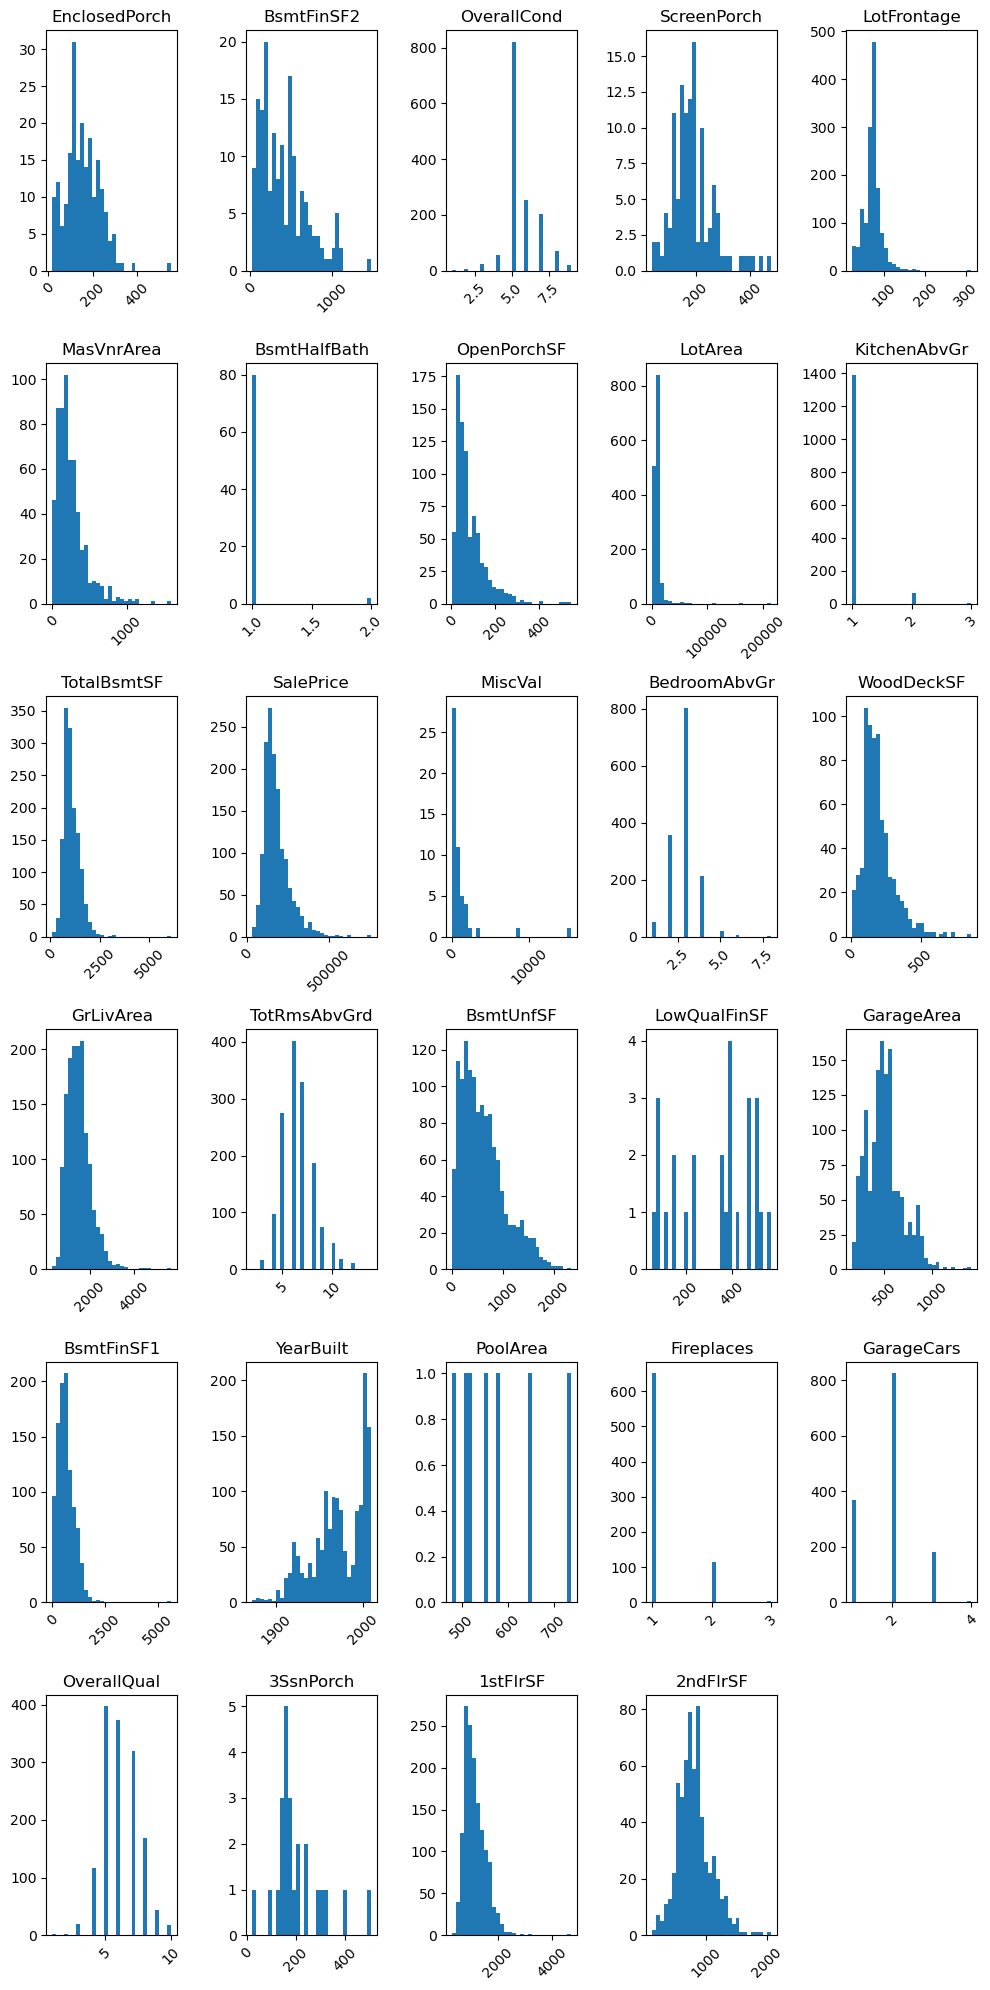

In [51]:
plot_histograms_grid(df, outlier_cols, bins=30, ncols=5, figsize=(10, 20))

<Axes: >

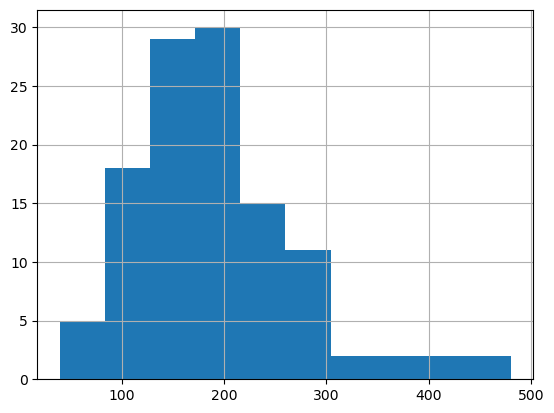

In [53]:
df.loc[df["ScreenPorch"] != 0,"ScreenPorch"].hist()

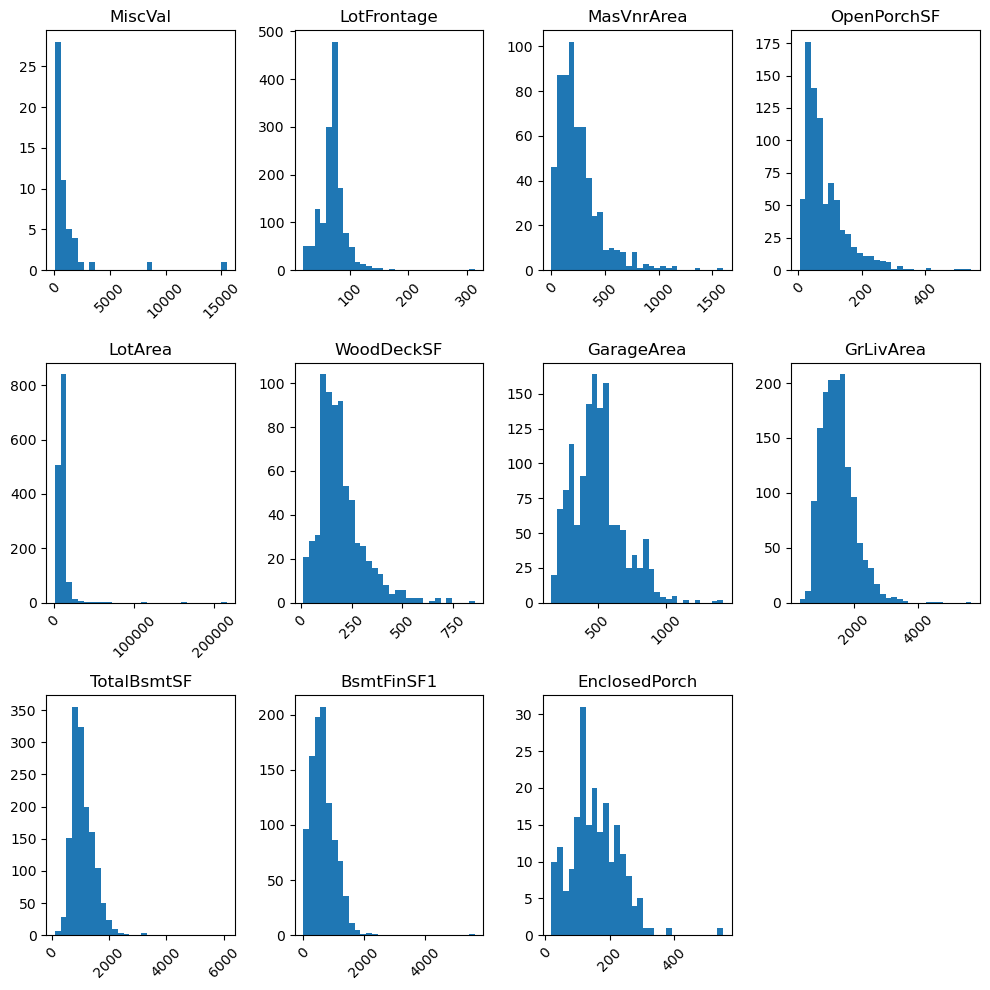

In [55]:
suspicious = ["MiscVal", "LotFrontage", "MasVnrArea", "OpenPorchSF", "LotArea", 
"WoodDeckSF", "GarageArea", "GrLivArea", "TotalBsmtSF",
"BsmtFinSF1", "EnclosedPorch"]

plot_histograms_grid(df, suspicious, bins=30, ncols=4, figsize=(10, 10))

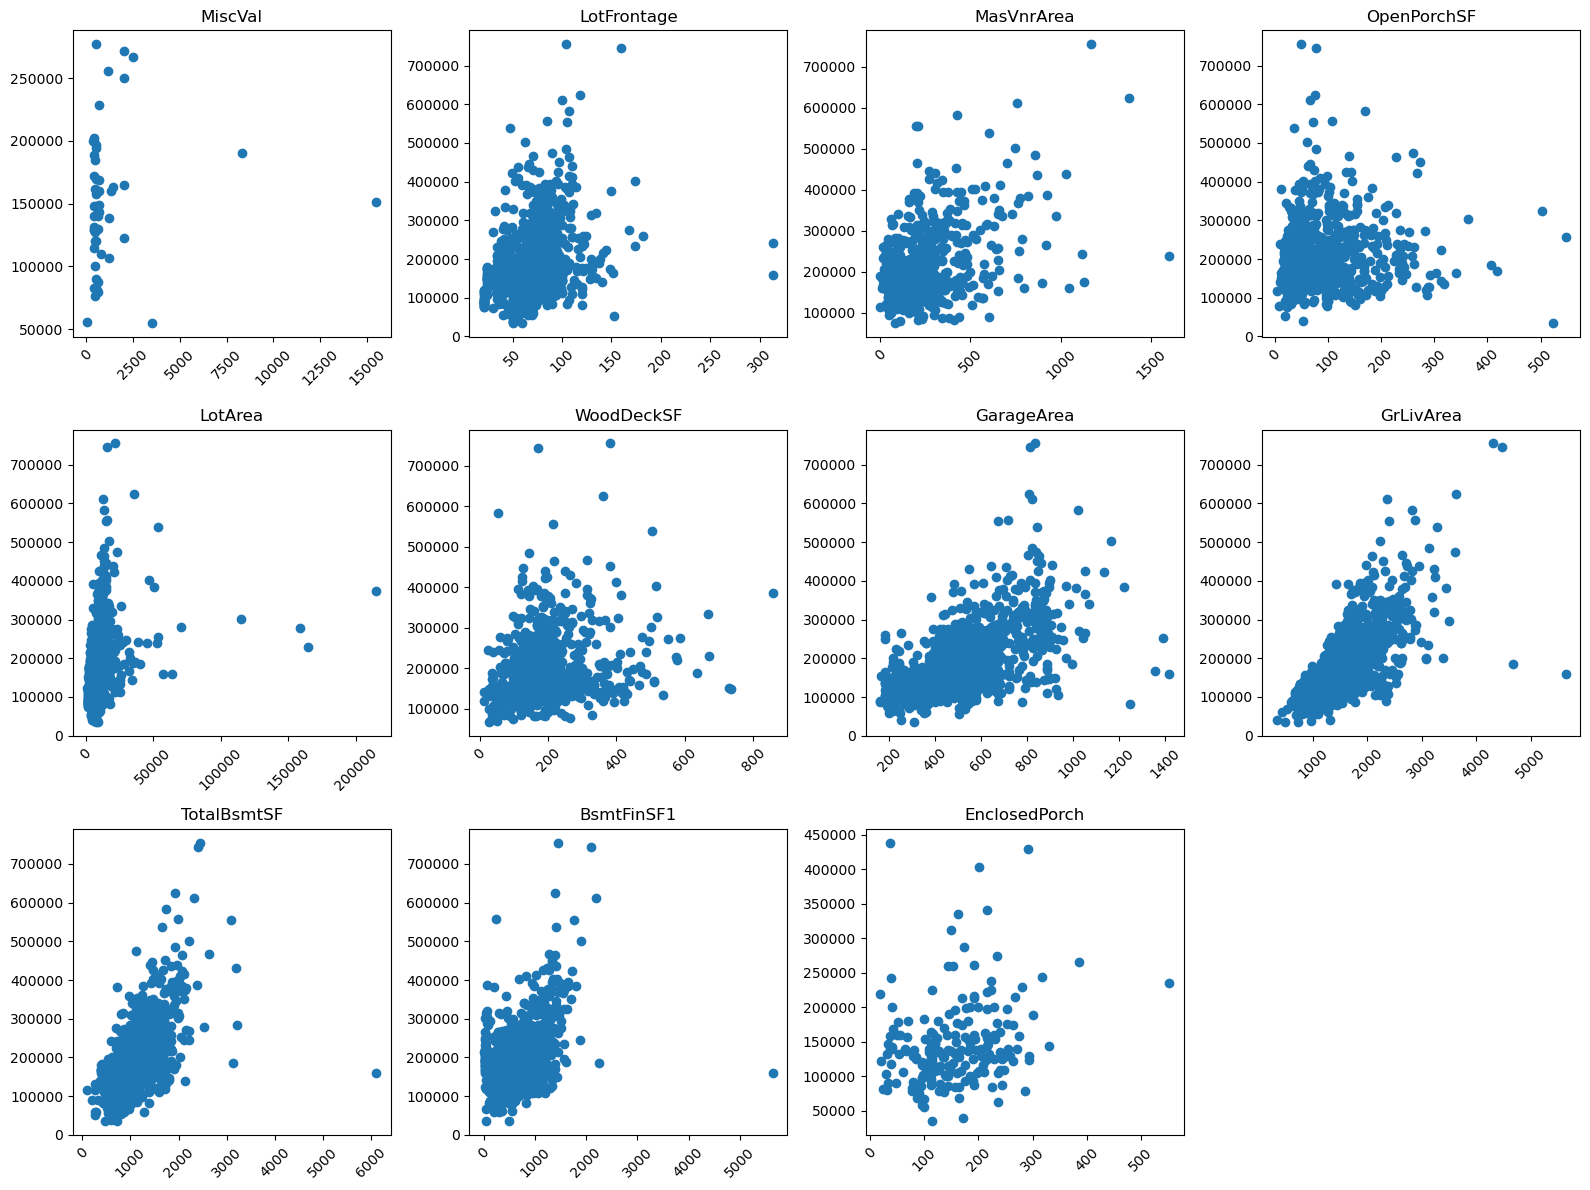

In [57]:
# Scatter plots of SalePrice vs suspicious features
pred = "SalePrice"
plot_scatter_grid(df, suspicious, pred, ncols=4, figsize=(16, 12))

In [55]:
df.loc[df["LotArea"]>100000, "MSZoning"]

249    RL
313    RL
335    RL
706    RL
Name: MSZoning, dtype: object

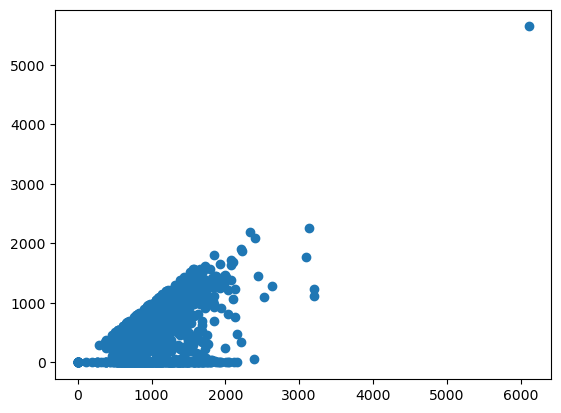

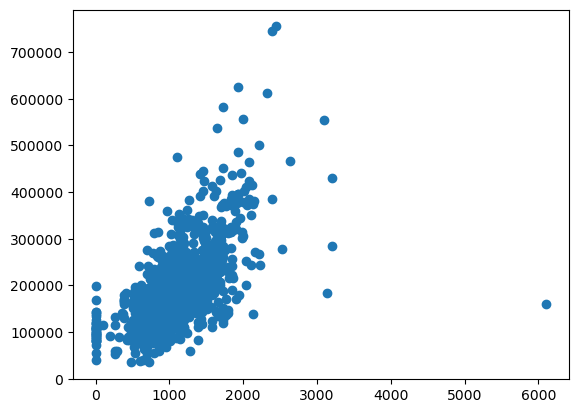

In [57]:
plt.scatter(df["TotalBsmtSF"], df["BsmtFinSF1"])
plt.show()

plt.figure()
plt.scatter(df["TotalBsmtSF"], df["SalePrice"])

TotalBsmtSF and BsmtFinSF1 seem coherent with one another, but one of them is more than 5000 ft². When plotting saleprice against it, we find one outlier. Two features confirm that the entry is not data error, but the observation does not follow the trend. We remove this row


In [60]:
df = df.drop(df[(df["TotalBsmtSF"]>5000)].index)

### MiscVal

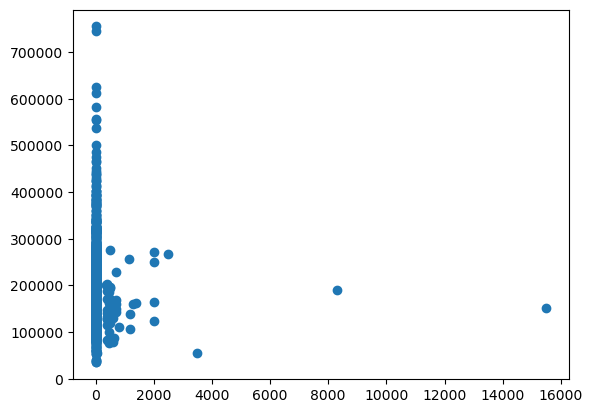

In [65]:
plt.scatter(df["MiscVal"], df["SalePrice"])

In [67]:
reg = LinearRegression().fit(df.loc[df["MiscVal"]!= 0, ["MiscVal"]], df.loc[df["MiscVal"]!= 0, "SalePrice"])
reg.coef_
reg

LinearRegression()

In [69]:
df.loc[df["MiscVal"]>3000, "MiscFeature"]

346     Gar2
705     Othr
1230    Gar2
Name: MiscFeature, dtype: object

In [71]:
df.loc[df["MiscFeature"] == "Gar2", "MiscVal"]

346     15500
1230     8300
Name: MiscVal, dtype: int64

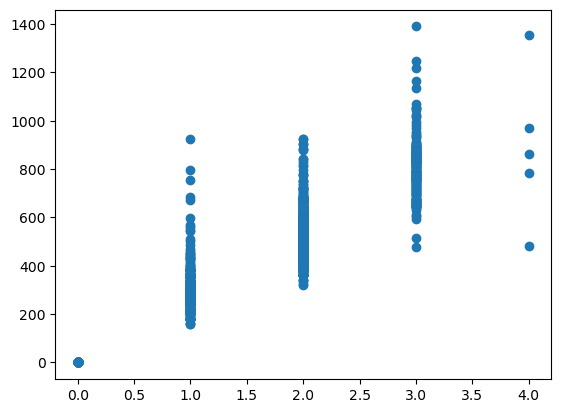

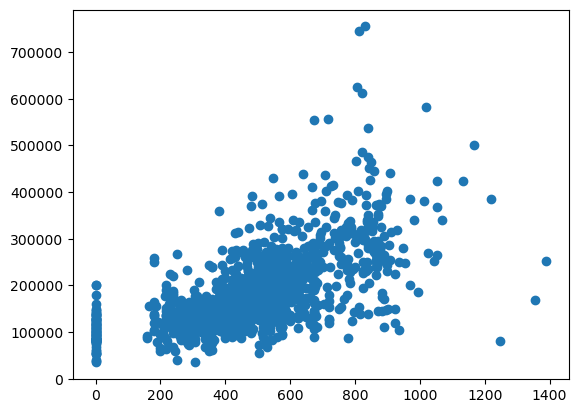

In [73]:
# GarageArea vs GarageCar
plt.figure()
plt.scatter(df["GarageCars"], df["GarageArea"])
plt.show()

plt.figure()
plt.scatter(df["GarageArea"], df["SalePrice"])


MiscVal: No outliers, since the two extreme points represent the values of a second garage.

LotFrontage: Two are exactly 313 feet. Seems enormous. Impute by median



In [76]:
df.loc[df["1stFlrSF"]+df["2ndFlrSF"]+df["TotalBsmtSF"]> df["LotArea"]]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
56,57,2-STORY PUD - 1946 & NEWER,FV,24.0,2645,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,Twnhs,2Story,8,5,1999,2000,Gable,CompShg,MetalSd,MetalSd,BrkFace,456.0,Gd,TA,PConc,Gd,TA,No,GLQ,649,Unf,0,321,970,GasA,Ex,Y,SBrkr,983,756,0,1739,1,0,2,1,3,1,Gd,7,Typ,0,None,Attchd,1999.0,Fin,2,480,TA,TA,Y,115,0,0,0,0,0,None,None,None,0,8,2009,WD,Abnorml,172500
145,146,2-STORY PUD - 1946 & NEWER,RM,24.0,2522,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Twnhs,2Story,6,5,2004,2006,Gable,CompShg,VinylSd,VinylSd,Stone,50.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,970,970,GasA,Ex,Y,SBrkr,970,739,0,1709,0,0,2,0,3,1,Gd,7,Maj1,0,None,Detchd,2004.0,Unf,2,380,TA,TA,Y,0,40,0,0,0,0,None,None,None,0,4,2006,WD,Normal,130000
180,181,2-STORY PUD - 1946 & NEWER,FV,24.0,2117,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,Twnhs,2Story,6,5,2000,2000,Gable,CompShg,MetalSd,MetalSd,BrkFace,456.0,Gd,TA,PConc,Gd,TA,No,GLQ,436,Unf,0,320,756,GasA,Ex,Y,SBrkr,769,756,0,1525,0,0,2,1,3,1,Gd,5,Typ,1,TA,Detchd,2000.0,Unf,2,440,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,6,2007,WD,Normal,177000
193,194,2-STORY PUD - 1946 & NEWER,RM,24.0,2522,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Twnhs,2Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,Stone,50.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,970,970,GasA,Ex,Y,SBrkr,970,739,0,1709,0,0,2,0,3,1,Gd,7,Maj1,0,None,Detchd,2004.0,Unf,2,380,TA,TA,Y,0,40,0,0,0,0,None,None,None,0,5,2006,WD,Normal,130000
195,196,2-STORY PUD - 1946 & NEWER,RL,24.0,2280,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,6,6,1976,1976,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,566,Unf,0,289,855,GasA,TA,Y,SBrkr,855,601,0,1456,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1976.0,Unf,2,440,TA,TA,Y,87,0,0,0,0,0,None,None,None,0,7,2009,WD,Normal,148500
225,226,2-STORY PUD - 1946 & NEWER,RM,21.0,1680,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story,5,5,1971,1971,Gable,CompShg,HdBoard,HdBoard,BrkFace,142.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,630,630,GasA,TA,Y,SBrkr,630,672,0,1302,0,0,2,1,3,1,TA,6,Typ,0,None,Detchd,1991.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,5,2009,COD,Abnorml,112000
432,433,2-STORY PUD - 1946 & NEWER,RM,24.0,1920,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,TwnhsE,2Story,5,5,1971,1971,Gable,CompShg,HdBoard,HdBoard,BrkFace,376.0,TA,TA,CBlock,TA,TA,No,ALQ,471,Unf,0,294,765,GasA,Ex,Y,SBrkr,765,600,0,1365,1,0,1,1,2,1,TA,6,Min1,0,None,Detchd,1971.0,Unf,2,440,TA,TA,Y,240,36,0,0,0,0,None,None,None,0,8,2007,WD,Normal,122500
482,483,2-STORY 1945 & OLDER,RM,50.0,2500,Pave,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,7,8,1915,2005,Gable,CompShg,Stucco,Stucco,None,0.0,Gd,TA,PConc,TA,TA,No,ALQ,299,Unf,0,611,910,GasA,Ex,Y,SBrkr,916,910,0,1826,1,0,1,1,4,1,Ex,7,Min2,1,Gd,Attchd,1915.0,Unf,1,164,Fa,Fa,Y,0,0,0,0,0,0,None,None,None,0,6,2009,WD,Normal,155000
599,600,2-STORY PUD - 1946 & NEWER,RM,24.0,1950,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Blueste,Norm,Norm,Twnhs,2Story,6,6,1980,1980,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,Gd,TA,No,LwQ,81,GLQ,612,23,716,GasA,TA,Y,SBrkr,716,840,0,1556,1,0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1980.0,Fin,2,

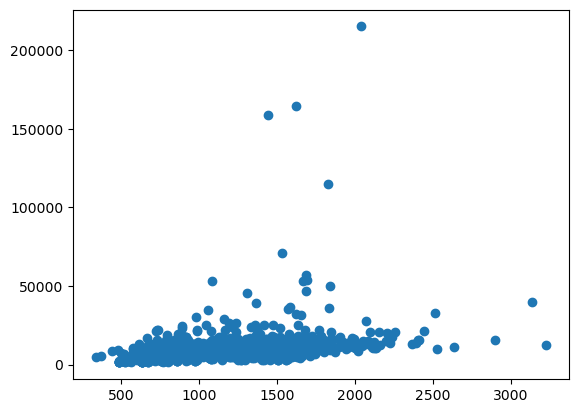

In [78]:
plt.scatter(df["1stFlrSF"], df["LotArea"])

In [80]:
df.loc[df["LotArea"] < df["WoodDeckSF"]]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [82]:
df.loc[df["LotArea"] < df["OpenPorchSF"]]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


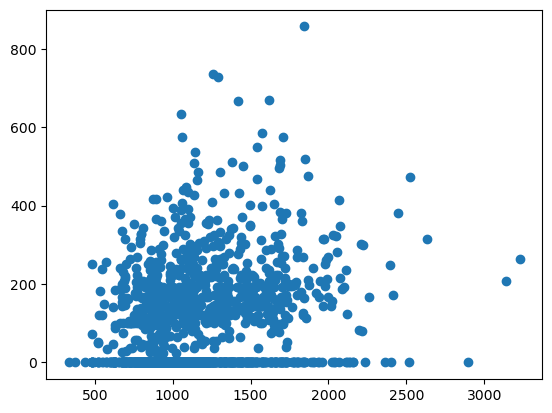

In [84]:
plt.scatter(df["1stFlrSF"], df["WoodDeckSF"])

In [86]:
df.loc[df["LotFrontage"]>300, ["LotFrontage"]] = df["LotFrontage"].median()

In [88]:
df.loc[df["MasVnrArea"] > 1250, :]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,298,2-STORY 1946 & NEWER,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,1997,1998,Hip,CompShg,VinylSd,VinylSd,BrkFace,1600.0,Gd,TA,PConc,Gd,TA,No,BLQ,649,Unf,0,326,975,GasA,Ex,Y,SBrkr,975,975,0,1950,0,0,2,1,3,1,Gd,7,Typ,1,TA,Detchd,1997.0,RFn,2,576,TA,TA,Y,0,10,0,0,198,0,None,None,None,0,6,2007,WD,Normal,239000
1169,1170,2-STORY 1946 & NEWER,RL,118.0,35760,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387,Unf,0,543,1930,GasA,Ex,Y,SBrkr,1831,1796,0,3627,1,0,3,1,4,1,Gd,10,Typ,1,TA,Attchd,1995.0,Fin,3,807,TA,TA,Y,361,76,0,0,0,0,None,None,None,0,7,2006,WD,Normal,625000


# Outlier detection via model sensitivity
We should use log(SalePrice) and fit a ridge linear model to detect outliers. Use cross-validation to find the best regularizer, compute the error. Then for each feature, remove suspicious points, and observe if dropping the points improves prediction accuracy with the same regularization parameter (otherwise, we can't tell if an RMSE improvement is due to the fact that we changed the regularization param or if we dropped the point). If so, drop the points (rows). Else, keep. 

# Fit a model

## Using vanilla linear regression

In [173]:
categorical_cols = df.select_dtypes(include=["object", "category"]).columns
df_dummies = pd.get_dummies(
    df,
    columns=categorical_cols,
    drop_first=True
)



In [ ]:
new_df = df[[target, predictor]]
kf = KFold(n_splits = 5, shuffle = True, random_state = 0)
SSE = []

for train_idx, test_idx in kf.split(new_df):
    # Split
    X_tr = new_df.iloc[train_idx][[predictor]].to_numpy() #NOTE DOUBLE BRACKETS!
    X_te = new_df.iloc[test_idx ][[predictor]].to_numpy() #NOTE DOUBLE BRACKETS!
    Y_tr = new_df.iloc[train_idx][target].to_numpy()
    Y_te = new_df.iloc[test_idx ][target].to_numpy()

    if target_type == "Numeric":
        if predictor_type == "Numeric":
            # Regression
            reg = LinearRegression().fit(X_tr, Y_tr)
            Y_hat = reg.predict(X_te)
            SSE.append(np.sum((Y_hat - Y_te)**2))

## Using Lasso

In [163]:
# --- wrapper around fill_NA(df1, df2) ---
class FillNAWrapper(BaseEstimator, TransformerMixin):
    def __init__(self, fill_NA):
        self.fill_NA = fill_NA
        self.df1_ = None

    def fit(self, X, y=None):
        self.df1_ = X
        return self

    def transform(self, X):
        return self.fill_NA(self.df1_, X)


# --- data ---
X = df.drop(columns="SalePrice")
y = np.log1p(df["SalePrice"])

# --- preprocessing ---
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(),
         make_column_selector(dtype_include=np.number)),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"),
         make_column_selector(dtype_include=["object", "category"]))
    ]
)

In [175]:
from sklearn.linear_model import LassoCV

# --- model ---
alphas = np.logspace(-3, 3, 50)

model = Pipeline(
    steps=[
        ("fill_na", FillNAWrapper(fill_NA)),
        ("preprocess", preprocessor),
        ("lasso", LassoCV(alphas=alphas))
    ]
)

# fit

lasso_fit = model.fit(X, y)

feature_names = (
    lasso_fit
    .named_steps["preprocess"]
    .get_feature_names_out()
)

print("Best alpha:", model.named_steps["lasso"].alpha_)

scores = -cross_val_score(
    model,
    X,
    y,
    scoring="neg_root_mean_squared_error",
    cv=5
)

log_rmse_lasso = scores.mean()
print("CV RMSE (log scale):", scores.mean())

lasso_coef = lasso_fit.named_steps["lasso"].coef_



Best alpha: 0.001


C:\Users\julien\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [15, 20, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\julien\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [11, 23, 28, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\julien\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [17, 32, 41] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\julien\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [6, 11, 16] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


CV RMSE (log scale): 0.14115315701144135


C:\Users\julien\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [11, 14, 15, 16, 17, 27, 39, 41] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [258]:
# Fit preprocessing once
X_processed = preprocessor.fit_transform(X)
feature_names = preprocessor.get_feature_names_out()

from sklearn.utils import resample

n_boot = 200
selected = np.zeros((n_boot, X_processed.shape[1]))

for i in range(n_boot):
    X_boot, y_boot = resample(X_processed, y)
    
    lasso = LassoCV(alphas=alphas)
    lasso.fit(X_boot, y_boot)
    
    selected[i] = (lasso.coef_ != 0)

selection_freq = selected.mean(axis=0)

important_features = pd.Series(
    selection_freq,
    index=feature_names
).sort_values(ascending=False)


ValueError: Input X contains NaN.
LassoCV does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [250]:
from sklearn.utils import resample
from sklearn.base import clone
import time

start_time = time.time()

B = 20
selection_counts = {v: 0 for v in sel_vars}

for b in range(B):

    Xb, yb = resample(X, y)

    lasso_b = clone(model).fit(Xb, yb)

    coef_b = lasso_b[-1].coef_
    fnames_b = (
        lasso_b.named_steps["preprocess"]
        .get_feature_names_out()
    )

    tmp = pd.DataFrame({
        "Feature": fnames_b,
        "coef": coef_b
    })

    tmp["variable"] = tmp["Feature"].map(map_variable)

    selected_b = (
        tmp
        .assign(nonzero=lambda d: d["coef"] != 0)
        .groupby("variable")["nonzero"]
        .any()
    )

    for v in selection_counts:
        if selected_b.get(v, False):
            selection_counts[v] += 1

selection_freq = pd.Series(selection_counts) / B
selection_freq = selection_freq.sort_values(ascending=False)

elapsed_time = time.time() - start_time
print(f'average_time = {elapsed_time/B}')


average_time = 0.5942392945289612


In [252]:
selection_freq

1stFlrSF         1.0
HeatingQC        1.0
Id               1.0
KitchenAbvGr     1.0
KitchenQual      1.0
LandContour      1.0
LotArea          1.0
LotConfig        1.0
LotFrontage      1.0
LowQualFinSF     1.0
MSSubClass       1.0
MSZoning         1.0
MasVnrArea       1.0
MiscVal          1.0
Neighborhood     1.0
OpenPorchSF      1.0
OverallCond      1.0
OverallQual      1.0
PavedDrive       1.0
PoolArea         1.0
RoofStyle        1.0
SaleCondition    1.0
SaleType         1.0
ScreenPorch      1.0
TotRmsAbvGrd     1.0
TotalBsmtSF      1.0
WoodDeckSF       1.0
YearBuilt        1.0
YearRemodAdd     1.0
HouseStyle       1.0
HalfBath         1.0
3SsnPorch        1.0
GrLivArea        1.0
BedroomAbvGr     1.0
BldgType         1.0
BsmtCond         1.0
BsmtExposure     1.0
BsmtFinSF2       1.0
BsmtFinType1     1.0
BsmtFinType2     1.0
BsmtFullBath     1.0
BsmtHalfBath     1.0
BsmtQual         1.0
CentralAir       1.0
Condition1       1.0
EnclosedPorch    1.0
ExterCond        1.0
ExterQual    

## Using Ridge

In [183]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score

# --- model ---
alphas = np.logspace(-3, 3, 50)

model = Pipeline(
    steps=[
        ("fill_na", FillNAWrapper(fill_NA)),
        ("preprocess", preprocessor),
        ("ridge", RidgeCV(alphas=alphas))
    ]
)

# --- fit ---
ridge_fit = model.fit(X, y)

print("Best alpha:", model.named_steps["ridge"].alpha_)

scores = -cross_val_score(
    model,
    X,
    y,
    scoring="neg_root_mean_squared_error",
    cv=5
)

log_rmse_ridge = scores.mean()
print("CV RMSE (log scale):", scores.mean())

ridge_coef = ridge_fit.named_steps["ridge"].coef_


Best alpha: 19.306977288832496


C:\Users\julien\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [15, 20, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\julien\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [11, 23, 28, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\julien\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [17, 32, 41] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\julien\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [6, 11, 16] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


CV RMSE (log scale): 0.14008573051870227


C:\Users\julien\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [11, 14, 15, 16, 17, 27, 39, 41] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [151]:
ridge_fit

Pipeline(steps=[('fill_na',
                 FillNAWrapper(fill_NA=<function fill_NA at 0x00000194240CBB00>)),
                ('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000019425B29D00>),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_colu...
       8.68511374e-01, 1.15139540e+00, 1.52641797e+00, 2.02358965e+00,
       2.68269580e+00, 3.55648031e+00, 4.71486636e+00, 6.25055193e+00,
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03])))])

## Interpretation

In [211]:
# --- get transformed feature names ---
feature_names = lasso_fit.named_steps["preprocess"].get_feature_names_out()

coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Ridge": ridge_coef,
    "Lasso": lasso_coef
}).sort_values("Lasso", key=abs, ascending=False)

# --- recover mapping from dummy to original categorical variable ---
ohe = lasso_fit.named_steps["preprocess"].named_transformers_["cat"]

all_cat_dummies = ohe.get_feature_names_out(ohe.feature_names_in_)

dummy_to_var = {}
for dummy in all_cat_dummies:
    # dummy looks like: "city_London" or "job_self_employed"
    var = next(
        v for v in ohe.feature_names_in_
        if dummy.startswith(v + "_")
    )
    dummy_to_var[dummy] = var

# --- map back to original variable name ---
def map_variable(f):
    if f.startswith("num__"):
        return f.replace("num__", "")
    elif f.startswith("cat__"):
        return dummy_to_var[f.replace("cat__", "")]
    else:
        return f

coef_df["variable"] = coef_df["Feature"].map(map_variable)

# --- Lasso variable selection (variable survives if ANY dummy survives) ---
selected = (
    coef_df
    .assign(nonzero=lambda d: d["Lasso"] != 0)
    .groupby("variable")["nonzero"]
    .any()
)

sel_vars = selected[selected].index


In [218]:
# Now, refit a linear model on the selected variables

from sklearn.linear_model import LinearRegression

# --- split selected vars into numeric / categorical ---
num_selected = [v for v in sel_vars if v in X.select_dtypes(include=np.number).columns]
cat_selected = [v for v in sel_vars if v in X.select_dtypes(include=["object", "category"]).columns]

# --- new preprocessor on selected variables only ---
post_lasso_preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_selected),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_selected)
    ]
)

# --- OLS pipeline ---
ols_model = Pipeline(
    steps=[
        ("fill_na", FillNAWrapper(fill_NA)),
        ("preprocess", post_lasso_preprocessor),
        ("ols", LinearRegression())
    ]
)

# --- fit ---
ols_fit = ols_model.fit(X, y)


ols_feature_names = (
    ols_fit.named_steps["preprocess"]
    .get_feature_names_out()
)

ols_coef = ols_fit.named_steps["ols"].coef_

ols_coef_df = pd.DataFrame({
    "Feature": ols_feature_names,
    "OLS_coef": ols_coef
}).sort_values("OLS_coef", key=abs, ascending=False)

ols_coef_df["pct_effect"] = (np.exp(ols_coef_df["OLS_coef"]) - 1) * 100


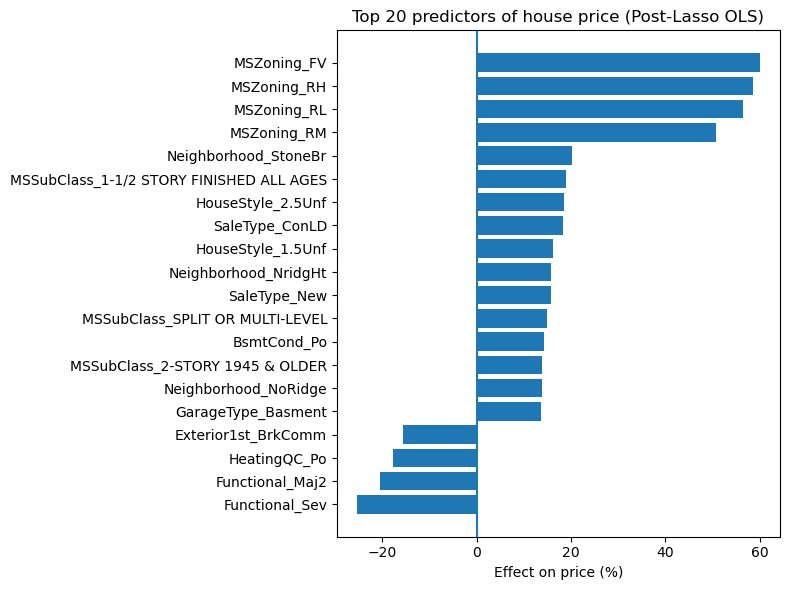

In [222]:
plot_df = ols_coef_df.copy()

plot_df["label"] = (
    plot_df["Feature"]
    .str.replace("num__", "", regex=False)
    .str.replace("cat__", "", regex=False)
)

top = (
    plot_df
    .sort_values("pct_effect", key=abs, ascending=False)
    .head(20)
    .sort_values("pct_effect")
)

plt.figure(figsize=(8,6))

plt.barh(top["label"], top["pct_effect"])
plt.axvline(0)

plt.xlabel("Effect on price (%)")
plt.title("Top 20 predictors of house price (Post-Lasso OLS)")

plt.tight_layout()
plt.show()


## Using Elastic net

In [133]:
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import cross_val_score
import numpy as np

# Define alpha grid
alphas = np.logspace(-3, 3, 50)

model = Pipeline(
    steps=[
        ("fill_na", FillNAWrapper(fill_NA)),
        ("preprocess", preprocessor),
        ("elasticnet", ElasticNetCV(
            alphas=alphas,
            l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9, 1],
            cv=5,
            max_iter=10000,
            n_jobs=-1
        ))
    ]
)

# Fit
elastic_fit = model.fit(X, y)

# Best parameters
print("Best alpha:", model.named_steps["elasticnet"].alpha_)
print("Best l1_ratio:", model.named_steps["elasticnet"].l1_ratio_)

# Cross-validated RMSE (log scale)
scores = -cross_val_score(
    model,
    X,
    y,
    scoring="neg_root_mean_squared_error",
    cv=5,
    n_jobs=-1
)

log_rmse_elastic = scores.mean()
print("CV RMSE (log scale):", log_rmse_elastic)


Best alpha: 0.004094915062380427
Best l1_ratio: 0.1
CV RMSE (log scale): 0.13968256932840203


## Using XGBoost

In [137]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

# --- data ---
X = df.drop(columns="SalePrice")
y = np.log1p(df["SalePrice"])

# --- XGBoost model ---
xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    tree_method="hist"   # much faster
)

model = Pipeline(
    steps=[
        ("fill_na", FillNAWrapper(fill_NA)),
        ("preprocess", preprocessor),
        ("xgb", xgb)
    ]
)

# --- cross-validation ---
scores = -cross_val_score(
    model,
    X,
    y,
    scoring="neg_root_mean_squared_error",
    cv=5,
    n_jobs=-1
)

log_rmse_xgb = scores.mean()

print("CV log RMSE (XGBoost):", log_rmse_xgb)


CV log RMSE (XGBoost): 0.12525996035364206


# Other useful tools

In [ ]:
#Find all columns that contain at least one NA
X_test.columns[X_test.isna().any()]

In [137]:
df = df.drop(columns = df.columns[df.isna().mean()>.4])
df[df.columns[df.isna().any()]]



,LotFrontage,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,65.0,196.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,2003.0,RFn,TA,TA
1,80.0,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,1976.0,RFn,TA,TA
2,68.0,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,2001.0,RFn,TA,TA
3,60.0,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,1998.0,Unf,TA,TA
4,84.0,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,2000.0,RFn,TA,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,0.0,Gd,TA,No,Unf,Unf,SBrkr,Attchd,1999.0,RFn,TA,TA
1456,85.0,119.0,Gd,TA,No,ALQ,Rec,SBrkr,Attchd,1978.0,Unf,TA,TA
1457,66.0,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Attchd,1941.0,RFn,TA,TA
1458,68.0,0.0,TA,TA,Mn,GLQ,Rec,FuseA,Attchd,1950.0,Unf,TA,TA


In [159]:
df["BsmtQual"].value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [153]:
df["BsmtQual"].isna().sum()

37

# Other useful functions

<Axes: >

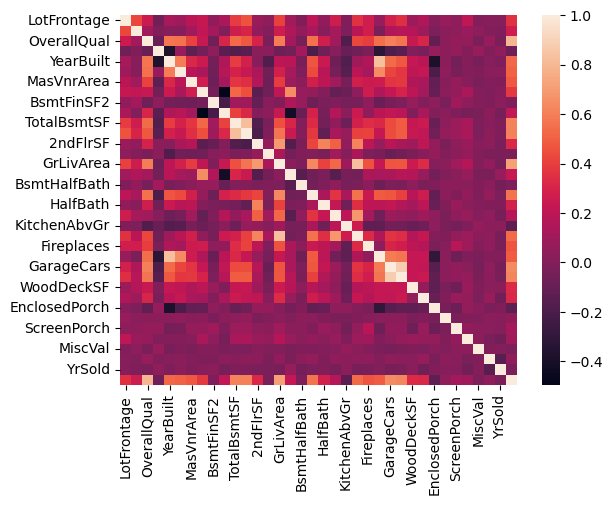

In [50]:
# What about LotFrontage? Find what features LotFrontage is the most correlated with

num_cols = df.select_dtypes(include = "number").columns

sns.heatmap(df[num_cols].corr())

In [ ]:
def explained_variance_ratio(y, *groups):
    overall_var = y.var()
    group_var = (
        y.groupby(list(groups))
         .apply(lambda x: x.var())
         .mean()
    )
    return 1 - group_var / overall_var

cat_cols = df.select_dtypes(include=["object", "category"]).columns

evr = {
    col: explained_variance_ratio(df["LotFrontage"], df[col])
    for col in cat_cols
}

pd.Series(evr).sort_values(ascending=False).head(10)


In [ ]:
## "Correlations" between lotfrontage and categorical variables
explained_variance_ratio(df["LotFrontage"], df["MiscFeature"], df["BldgType"], df["GarageCond"])

# It seems simply conditioning on "MiscFeature" is enough. Adding more explanatory variables doesn't seem to help
# Warning! MiscFeature is almost completely full of NA values! The second explanatory variable, BldgType seems better


In [3]:
df = pd.read_csv("train.csv")

missing_tokens = ["NaN"]
df.replace(missing_tokens, np.nan, inplace = True)
df = df.set_index("Id")
#df.loc[:, df.isnull().any()]

In [ ]:

def plot_hist_outliers(df, cols, bins):
    for col in cols:
        plt.figure()
        plt.hist(df[col], bins = bins)
        plt.title(col)
        plt.xlabel(col)
        plt.ylabel("counts")
        plt.show()

In [ ]:
df_test = pd.read_csv("test.csv")
df_test = clean_up_MSSubClass(df_test)
X_test = fill_NA(df, df_test)

y_test_pred_log = ridge_fit.predict(X_test)
y_test_pred = np.expm1(y_test_pred_log)

y_test = pd.read_csv("sample_submission.csv")

# Test if alignment is guaranteed

# print(X_test.index.equals(y_test.index)) 
# If returns false, output this
# y_test = y_test.loc[X_test.index]

y_pred = pd.Series(y_test_pred, index=X_test.index)

error_ridge = np.sqrt(np.mean((y_pred - y_test["SalePrice"])**2))